<h1>Identify Diabetic Patient Readmission</h1>

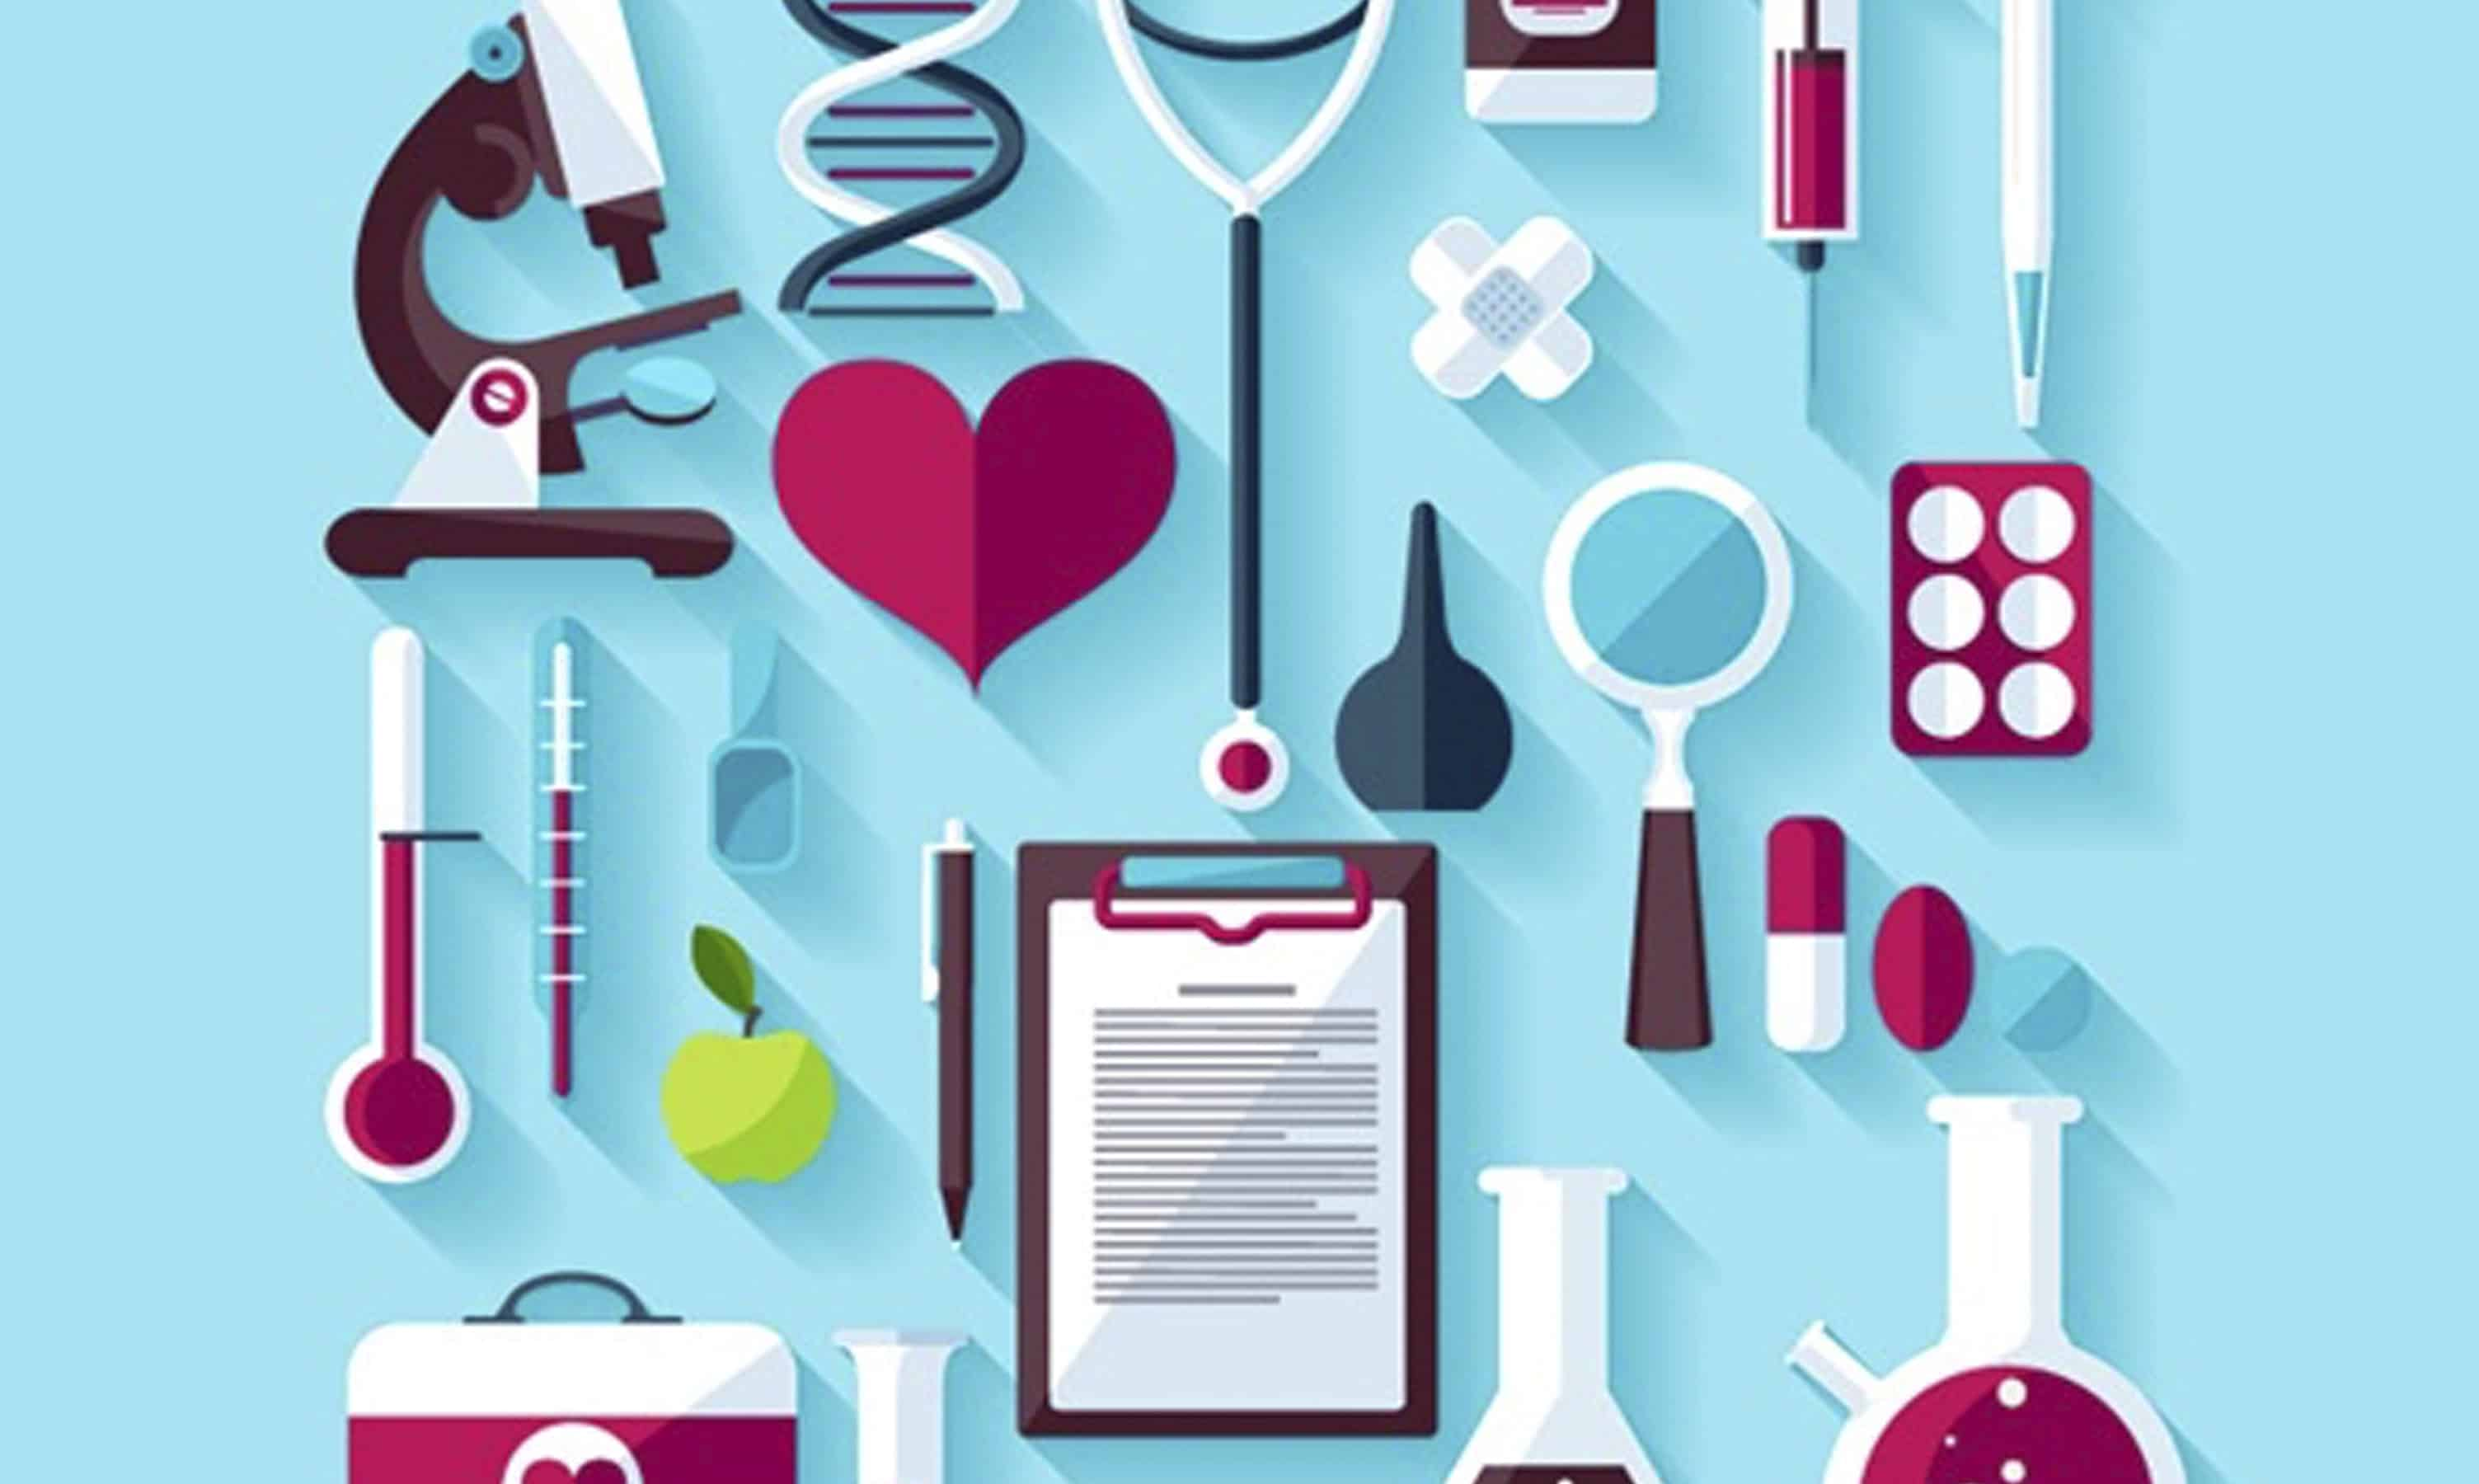

<b>OBJECTIVE : To predict the hospital re-admission probability of a DIABETIC patient by using appropriate Data Science techniques.
</b>

- A clinic readmission is the point at which a patient who is released from the emergency clinic, gets re-conceded again inside a specific timeframe. Clinic readmission rates for specific conditions are currently viewed as a marker of medical clinic quality, and furthermore influence the expense of care antagonistically. 
- Thus, Centers for Medicare and Medicaid Services set up the Hospital Readmissions Reduction Program which means to improve nature of care for patients and decrease social insurance spending by applying installment punishments to emergency clinics that have more than anticipated readmission rates for specific conditions. 
- In 2011, American medical clinics spent over $41 billion on diabetic patients who got readmitted inside 30 days of release. Having the option to decide factors that lead to higher readmission in such patients, and correspondingly having the option to anticipate which patients will get readmitted can assist medical clinics with sparing a great many dollars while improving nature of care. 


Below are questions need to be answered from the analysis :

- What variables are the most grounded indicators of emergency clinic readmission in diabetic patients? 
- How well would we be able to foresee medical clinic readmission in this dataset with constrained highlights?

<b>About DATA : Data is retrieved from UCI (University of California, Irvine) repository</b>

- Encountered data are collected from 130 hospitals on Diabetic patient for a period of 1999-2008
- Dataset has over 50 features, including patient characteristics, conditions, tests and 23 medications.

<b> Why this DATA?</b>

- People Affected by Diabetes : 
    WORLD: 425m, USA: 26m (8.3% of the population)
- Expenditure on Diabetes:
    WORLD: 727b Dollars, USA: 327b Dollars
- People will be affected by Diabetes : 629 million 
- Penalties paid by US Hospitals due to readmission of patients: 528 million Dollars 
- Readmission Rates of diabetes patients are readmitted with 30-days of discharge : 20.3%

<h1>STEP: 1 - Data Cleaning</h1>

- Loading the required libraries for downstream activities

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
plt.style.use('seaborn')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
import statsmodels.api as stat_model
from sklearn.model_selection import GridSearchCV
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.metrics import f1_score, precision_score, confusion_matrix,recall_score, precision_recall_curve, auc, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from scipy.stats import skew
from pandas.plotting import scatter_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

- Reading the data from the csv files, will be used for training and testing of the model

In [2]:
data=pd.read_csv(r"challengetraining_data.csv")
print(data.shape)
data.head()

(81414, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,N
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,N
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,N
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,N


- Checking the null values for data loaded, but no null values found

In [3]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

- Displaying the unique values and percentage of unique values for each features, to identify other type of missing values and variation explain by each variables.
- Analyzed that feature weight, payer_code and medical_speciality have approximately 40% or more than 40% of data missing and represented by '?' 
- In variable 'Gender', missing value is shown by 'Unknown/Invalid', approximately 5 records

In [4]:
for col in data:
    print('Column name : {}\n{}'.format(col, data[col].value_counts()/len(data)))

Column name : encounter_id
116046918    0.000012
74824098     0.000012
84657354     0.000012
172755348    0.000012
211901586    0.000012
               ...   
276702294    0.000012
356032316    0.000012
129070404    0.000012
199469046    0.000012
77856768     0.000012
Name: encounter_id, Length: 81414, dtype: float64
Column name : patient_nbr
88785891    0.000405
43140906    0.000307
88227540    0.000270
1660293     0.000258
88789707    0.000233
              ...   
86882463    0.000012
47165598    0.000012
78618780    0.000012
24246423    0.000012
93251151    0.000012
Name: patient_nbr, Length: 60057, dtype: float64
Column name : race
Caucasian          0.747316
AfricanAmerican    0.189316
?                  0.022269
Hispanic           0.019861
Other              0.014936
Asian              0.006301
Name: race, dtype: float64
Column name : gender
Female             0.537401
Male               0.462574
Unknown/Invalid    0.000025
Name: gender, dtype: float64
Column name : age
[70-80)  

Column name : diag_2
276    0.066598
428    0.065320
250    0.059953
427    0.049230
401    0.036578
         ...   
977    0.000012
975    0.000012
374    0.000012
615    0.000012
V13    0.000012
Name: diag_2, Length: 722, dtype: float64
Column name : diag_3
250     0.114108
401     0.081190
276     0.051134
428     0.045078
427     0.038753
          ...   
395     0.000012
884     0.000012
E922    0.000012
538     0.000012
944     0.000012
Name: diag_3, Length: 755, dtype: float64
Column name : number_diagnoses
9     0.486415
5     0.112155
8     0.104184
7     0.101752
6     0.099553
4     0.054991
3     0.027808
2     0.009851
1     0.002186
16    0.000393
10    0.000172
13    0.000147
11    0.000123
15    0.000111
12    0.000098
14    0.000061
Name: number_diagnoses, dtype: float64
Column name : max_glu_serum
None    0.947822
Norm    0.025069
>200    0.014690
>300    0.012418
Name: max_glu_serum, dtype: float64
Column name : A1Cresult
None    0.832314
>8      0.080993
Norm    0.0

- Approximately more than 40% of data are missing, Dropping the columns 'weights', 'payer_code' and 'medical_speciality'
- Deleting the entire record for column 'Gender', which have value 'Unknown/Invalid'

In [5]:
data=data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)
data=data.replace('?',np.nan)
data['gender']=data['gender'].replace('Unknown/Invalid',np.nan)
data=data.dropna()
print(data.shape)
data.head()

(78465, 47)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,N
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,N
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,N
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,N
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,N


<h1>STEP: 2 - Feature Engineering and Feature Creation</h1>

- Number of medicine utilized : Total number of prescriptions utilized by the patient, so we made component by checking the meds utilized during the experience 
- Number of prescription changes : Data contains 23 variables for 23 medicines, regardless of whether an adjustment in that drug was made or not, so chose to tally what number of changes were made altogether for every patient 
- Service usage : Added information contains factors for number of inpatient, emergency room visits and outpatient visits 

In [6]:
drugs =  ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 
        'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
        'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
        'metformin-pioglitazone', 'citoglipton', 'examide']

for col in drugs:
    colname = str(col) + 'temp'
    data[colname] = data[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
    
data['numchange'] = 0
for col in drugs:
    colname = str(col) + 'temp'
    data['numchange'] = data['numchange'] + data[colname]
    del data[colname]
    
for col in drugs:
    data[col] = data[col].replace('No', 0)
    data[col] = data[col].replace('Steady', 1)
    data[col] = data[col].replace('Up', 1)
    data[col] = data[col].replace('Down', 1) 

data['nummed'] = 0
for col in drugs:
    data['nummed'] = data['nummed'] + data[col]

print(data.shape)
data.head()

(78465, 49)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,nummed
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Ch,Yes,N,1,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No,Yes,N,0,1
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Ch,Yes,N,1,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Ch,Yes,N,0,2
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No,Yes,N,0,1


- Encoded the 'medication change' feature from 'No' (no change) and 'Ch' (changed) into 0 and 1
- Similarly, converted 'Gender' variable from 'Male' and 'Female' into 1 and 0
- Also, changed 'diabetesMed' (Diabetic Medicine use) column from 'Yes' and 'No' into 1 and 0

In [7]:
data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)
data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)

print(data.shape)
data.head()

(78465, 49)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,nummed
1,149190,55629189,Caucasian,0,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,N,1,1
2,64410,86047875,AfricanAmerican,0,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,N,0,1
3,500364,82442376,Caucasian,1,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,N,1,1
4,16680,42519267,Caucasian,1,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,N,0,2
5,35754,82637451,Caucasian,1,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,N,0,1


- Dataset has multiple occurrence of same patient, which bring in biasness. So, keeping the first instance of the patient encounter and removing the other instances, with the help of column patient_nbr

In [8]:
data = data.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

print(data.shape)
data.head()

(57678, 49)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,nummed
1,149190,55629189,Caucasian,0,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,N,1,1
2,64410,86047875,AfricanAmerican,0,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,N,0,1
3,500364,82442376,Caucasian,1,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,N,1,1
4,16680,42519267,Caucasian,1,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,N,0,2
5,35754,82637451,Caucasian,1,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,N,0,1


- 'Diag_1','Diag_2' and 'Diag_3' have almost 700-900 categories, including these variables with 700-900 dummies, will make our model complex and time consuming
- 'Encounter_id' and 'patient_nbr' are columns, which just contain Id to uniquely identify each records and do not explain much variance about data
- Based on above insights, dropping all the 5 columns, to remove redundant part from the data

In [9]:
data = data.drop(columns=['diag_1','diag_2','diag_3','encounter_id','patient_nbr'],axis=1)

print(data.shape)
data.head()

(57678, 44)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,nummed
1,Caucasian,0,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,N,1,1
2,AfricanAmerican,0,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,N,0,1
3,Caucasian,1,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,N,1,1
4,Caucasian,1,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,N,0,2
5,Caucasian,1,[50-60),2,1,2,3,31,6,16,0,0,0,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,N,0,1


- Converting remaining categorical variables into numerical, column such as 'readmitted', 'A1Cresult' and 'max_glu_serum into binary values 1 and 0
- 'Age' feature has 10 categories, assuming maximum values of each categories. For Ex, Age as 10 for category value '0-10'

In [10]:
data['age'] = data.age.map({'[0-10)':10,'[10-20)':20, '[20-30)':30, '[30-40)':40, '[40-50)':50,'[50-60)':60, '[60-70)':70, '[70-80)':80, '[80-90)':90,'[90-100)':100})
data['age'] = data['age'].astype('int64')
data['readmitted'] = data['readmitted'].map({'Y':1,'N':0})
data['A1Cresult'] = data['A1Cresult'].map({'None':-99,'>7':1, '>8':1, 'Norm':0})
data['max_glu_serum'] = data['max_glu_serum'].map({'None':-99,'>300':1,'>200':1,'Norm':0 })

print(data.shape)
data.head()

(57678, 44)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,nummed
1,Caucasian,0,20,1,1,7,3,59,0,18,0,0,0,9,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1
2,AfricanAmerican,0,30,1,1,7,2,11,5,13,2,0,1,6,-99,-99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,Caucasian,1,40,1,1,7,2,44,1,16,0,0,0,7,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1
4,Caucasian,1,50,1,1,7,1,51,0,8,0,0,0,5,-99,-99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,2
5,Caucasian,1,60,2,1,2,3,31,6,16,0,0,0,9,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


- Generating the basic statistics such as mean, standard deviation, min, max, etc for the continuous variable 
- Observed that 4 medicines out of 23 have mean value less than 0.1, which says dominance of one value in the feature 

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,57678.0,0.466001,0.498847,0.0,0.0,0.0,1.0,1.0
age,57678.0,71.089670,15.529343,10.0,60.0,70.0,80.0,100.0
admission_type_id,57678.0,2.092080,1.506279,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,57678.0,3.636846,5.278340,1.0,1.0,1.0,3.0,28.0
admission_source_id,57678.0,5.685963,4.152320,1.0,1.0,7.0,7.0,25.0
time_in_hospital,57678.0,4.337702,2.963873,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,57678.0,43.193245,19.952895,1.0,31.0,44.0,57.0,132.0
num_procedures,57678.0,1.431291,1.757343,0.0,0.0,1.0,2.0,6.0
num_medications,57678.0,15.858768,8.261490,1.0,10.0,14.0,20.0,81.0
number_outpatient,57678.0,0.293318,1.077567,0.0,0.0,0.0,0.0,42.0


- Dropping the 19 medicine columns, since they do not explain much variance and adding no meaning to our model

In [12]:
drugs_drop =  ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
        'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
        'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
        'metformin-pioglitazone', 'citoglipton', 'examide']

data.drop(columns=drugs_drop, inplace=True, axis=1)

print(data.shape)
data.head()

(57678, 25)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,readmitted,numchange,nummed
1,Caucasian,0,20,1,1,7,3,59,0,18,0,0,0,9,-99,-99,0,0,0,1,1,1,0,1,1
2,AfricanAmerican,0,30,1,1,7,2,11,5,13,2,0,1,6,-99,-99,0,1,0,0,0,1,0,0,1
3,Caucasian,1,40,1,1,7,2,44,1,16,0,0,0,7,-99,-99,0,0,0,1,1,1,0,1,1
4,Caucasian,1,50,1,1,7,1,51,0,8,0,0,0,5,-99,-99,0,1,0,1,1,1,0,0,2
5,Caucasian,1,60,2,1,2,3,31,6,16,0,0,0,9,-99,-99,0,0,0,1,0,1,0,0,1


- Checking the datatype of each variable in the dataset and found almost all variables are integer

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57678 entries, 1 to 81413
Data columns (total 25 columns):
race                        57678 non-null object
gender                      57678 non-null int64
age                         57678 non-null int64
admission_type_id           57678 non-null int64
discharge_disposition_id    57678 non-null int64
admission_source_id         57678 non-null int64
time_in_hospital            57678 non-null int64
num_lab_procedures          57678 non-null int64
num_procedures              57678 non-null int64
num_medications             57678 non-null int64
number_outpatient           57678 non-null int64
number_emergency            57678 non-null int64
number_inpatient            57678 non-null int64
number_diagnoses            57678 non-null int64
max_glu_serum               57678 non-null int64
A1Cresult                   57678 non-null int64
metformin                   57678 non-null int64
glipizide                   57678 non-null int64
glyburid

- Creating dummies for the column race, admission_type, discharge_disposition and admission_source
- Variable race will have 5 dummies, admission_type 8 dummies, discharge_disposition approx 26 dummies and admission_source approx 20 dummies
- Deleting the main column from the dataset, after concatenating dummies for all the above columns in the main dataset

In [14]:
race_dummy = pd.get_dummies(data['race'],prefix='race')
admission_type_dummy = pd.get_dummies(data['admission_type_id'],prefix='admission_type')
discharge_disposition_dummy = pd.get_dummies(data['discharge_disposition_id'],prefix='discharge')
admission_source_dummy = pd.get_dummies(data['admission_source_id'],prefix='admission_source')

data = pd.concat([data, race_dummy,admission_type_dummy,discharge_disposition_dummy,admission_source_dummy], axis = 1)

data.drop(columns=['race', 'admission_type_id','discharge_disposition_id', 'admission_source_id'], axis = 1, inplace=True)

print(data.shape)
data.head()

(57678, 77)


,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,readmitted,numchange,nummed,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_1,admission_type_2,admission_type_3,admission_type_4,admission_type_5,admission_type_6,admission_type_7,admission_type_8,discharge_1,discharge_2,discharge_3,discharge_4,discharge_5,discharge_6,discharge_7,discharge_8,discharge_9,discharge_10,discharge_11,discharge_12,discharge_13,discharge_14,discharge_15,discharge_16,discharge_17,discharge_18,discharge_19,discharge_20,discharge_22,discharge_23,discharge_24,discharge_25,discharge_27,discharge_28,admission_source_1,admission_source_2,admission_source_3,admission_source_4,admission_source_5,admission_source_6,admission_source_7,admission_source_8,admission_source_9,admission_source_10,admission_source_11,admission_source_13,admission_source_14,admission_source_17,admission_source_20,admission_source_22,admission_source_25
1,0,20,3,59,0,18,0,0,0,9,-99,-99,0,0,0,1,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,30,2,11,5,13,2,0,1,6,-99,-99,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,40,2,44,1,16,0,0,0,7,-99,-99,0,0,0,1,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,50,1,51,0,8,0,0,0,5,-99,-99,0,1,0,1,1,1,0,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,1,60,3,31,6,16,0,0,0,9,-99,-99,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h1>STEP: 3 - Transformation and Outlier Removal</h1>

- Checking if features have skewness and have high kurtosis, which would impact standardization
- Three columns need to be transformed, performing log transformation where a skew or kurtosis beyond the limits of -2 ≤ skew and kurtosis ≤ 2

In [15]:
train=data

num_col = ['age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col

skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = train[i].skew()
    skew_before.append(skewval)
    
    kurtval = train[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = train[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(train[train[i] == 0])/len(train) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(train[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(train[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(train[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(train[train[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(train[train[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(train[train[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,age,-0.570989,0.166001,15.529343,No,NA,-0.570989,0.166001,15.529343
1,time_in_hospital,1.156465,0.927537,2.963873,No,NA,1.156465,0.927537,2.963873
2,num_lab_procedures,-0.219924,-0.288312,19.952895,No,NA,-0.219924,-0.288312,19.952895
3,num_procedures,1.219148,0.539435,1.757343,No,NA,1.219148,0.539435,1.757343
4,num_medications,1.413154,3.742335,8.261490,No,NA,1.413154,3.742335,8.261490
5,number_outpatient,8.777192,151.174081,1.077567,Yes,log1p,3.062745,9.938887,0.387981
6,number_emergency,21.562148,1165.513287,0.546149,Yes,log1p,4.090378,19.893543,0.238866
7,number_inpatient,4.822509,36.413340,0.665467,Yes,log1p,2.566101,6.529051,0.330318
8,number_diagnoses,-0.699220,-0.617789,1.879020,No,NA,-0.699220,-0.617789,1.879020


- Computing log(x) for any feature x if percentage of 0s in x ≤ 2%, after removing the zeros, which ensures that We don’t bulk-remove records that hold predictive power for other columns
- Compute log1p(x) otherwise (log1p(x) means log(x+1), while retaining the zeros

In [16]:
for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            train = train[train[colname] > 0]
            train[colname + "_log"] = np.log(train[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            train = train[train[colname] >= 0]
            train[colname + "_log1p"] = np.log1p(train[colname])

train = train.drop(['number_outpatient', 'number_inpatient', 'number_emergency'], axis = 1)

print(train.shape)
train.head()

(57678, 77)


,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,readmitted,numchange,nummed,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_1,admission_type_2,admission_type_3,admission_type_4,admission_type_5,admission_type_6,admission_type_7,admission_type_8,discharge_1,discharge_2,discharge_3,discharge_4,discharge_5,discharge_6,discharge_7,discharge_8,discharge_9,discharge_10,discharge_11,discharge_12,discharge_13,discharge_14,discharge_15,discharge_16,discharge_17,discharge_18,discharge_19,discharge_20,discharge_22,discharge_23,discharge_24,discharge_25,discharge_27,discharge_28,admission_source_1,admission_source_2,admission_source_3,admission_source_4,admission_source_5,admission_source_6,admission_source_7,admission_source_8,admission_source_9,admission_source_10,admission_source_11,admission_source_13,admission_source_14,admission_source_17,admission_source_20,admission_source_22,admission_source_25,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
1,0,20,3,59,0,18,9,-99,-99,0,0,0,1,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000
2,0,30,2,11,5,13,6,-99,-99,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.098612,0.0,0.693147
3,1,40,2,44,1,16,7,-99,-99,0,0,0,1,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000
4,1,50,1,51,0,8,5,-99,-99,0,1,0,1,1,1,0,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000
5,1,60,3,31,6,16,9,-99,-99,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000


- Anything within 3 Standard Deviations on either side of the mean would include 99.7% of our data and the remaining 0.3% we treat as outliers
- Using this logic, We restricted the data to within 3 Standard deviations on either side from the mean for each numeric column

In [17]:
num_cols = ['age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses']
train = train[(np.abs(sp.stats.zscore(train[num_cols])) < 3).all(axis=1)]

print(train.shape)
train.head()

(55944, 77)


,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,readmitted,numchange,nummed,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_1,admission_type_2,admission_type_3,admission_type_4,admission_type_5,admission_type_6,admission_type_7,admission_type_8,discharge_1,discharge_2,discharge_3,discharge_4,discharge_5,discharge_6,discharge_7,discharge_8,discharge_9,discharge_10,discharge_11,discharge_12,discharge_13,discharge_14,discharge_15,discharge_16,discharge_17,discharge_18,discharge_19,discharge_20,discharge_22,discharge_23,discharge_24,discharge_25,discharge_27,discharge_28,admission_source_1,admission_source_2,admission_source_3,admission_source_4,admission_source_5,admission_source_6,admission_source_7,admission_source_8,admission_source_9,admission_source_10,admission_source_11,admission_source_13,admission_source_14,admission_source_17,admission_source_20,admission_source_22,admission_source_25,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
2,0,30,2,11,5,13,6,-99,-99,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.098612,0.0,0.693147
3,1,40,2,44,1,16,7,-99,-99,0,0,0,1,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000
4,1,50,1,51,0,8,5,-99,-99,0,1,0,1,1,1,0,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000
5,1,60,3,31,6,16,9,-99,-99,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000
6,1,70,4,70,1,21,7,-99,-99,1,0,0,1,1,1,0,0,3,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000


<h1>STEP: 4 - Exploratory Data Analysis and Sampling</h1>

- Plotting Scatter matrix to check whether variables are related and whether variables relation is positive or negative

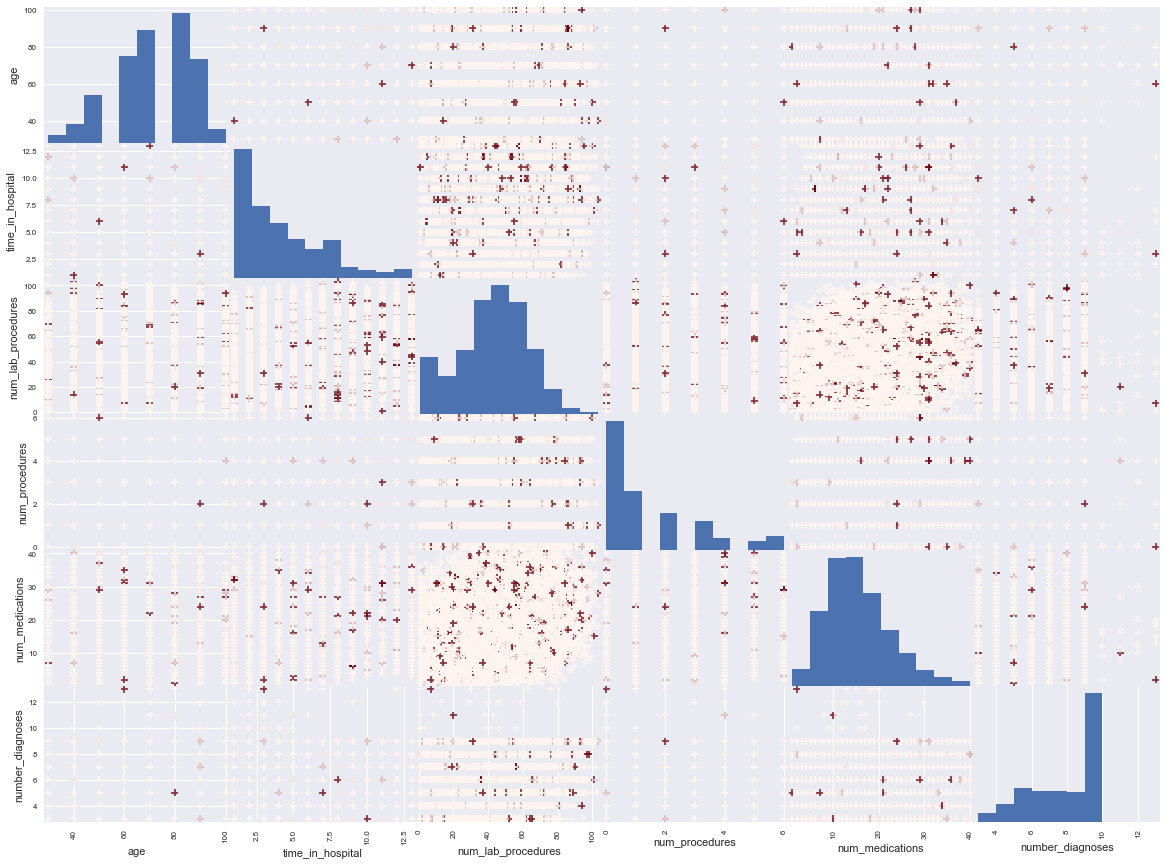

In [18]:
attributes=num_cols
scatter_matrix(train[attributes], figsize = (20,15), c = train.readmitted, alpha = 0.8, cmap="Reds", marker = '+')
plt.show()

- Graphing Heatmap to check whether interaction terms of variables have any positive or negative correlation

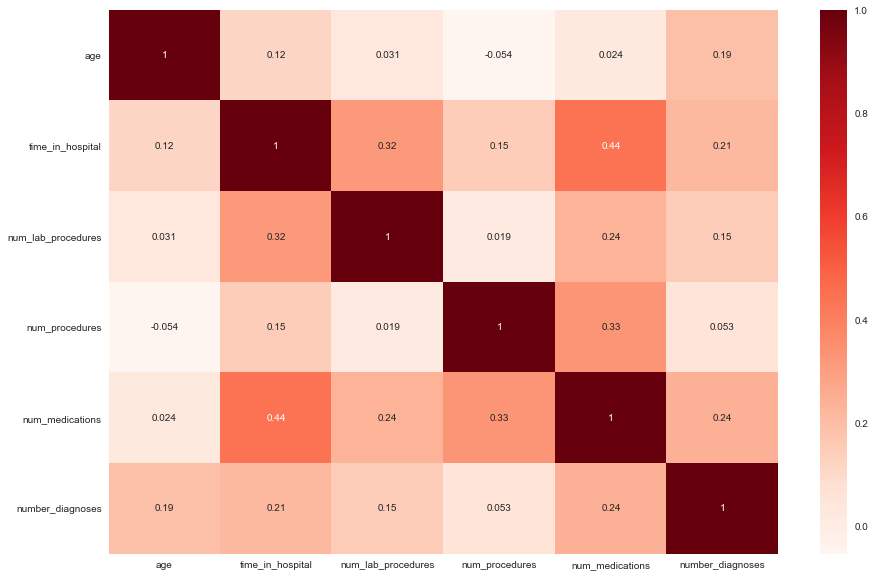

In [19]:
plt.figure(figsize=(15,10)) 
sns.heatmap(train[attributes].corr(), annot=True, cmap="Reds") 
plt.show()

- Displaying pairplot to have histogram and scatterplot together, inorder to find the distribution of the variables and see relationship between the variables

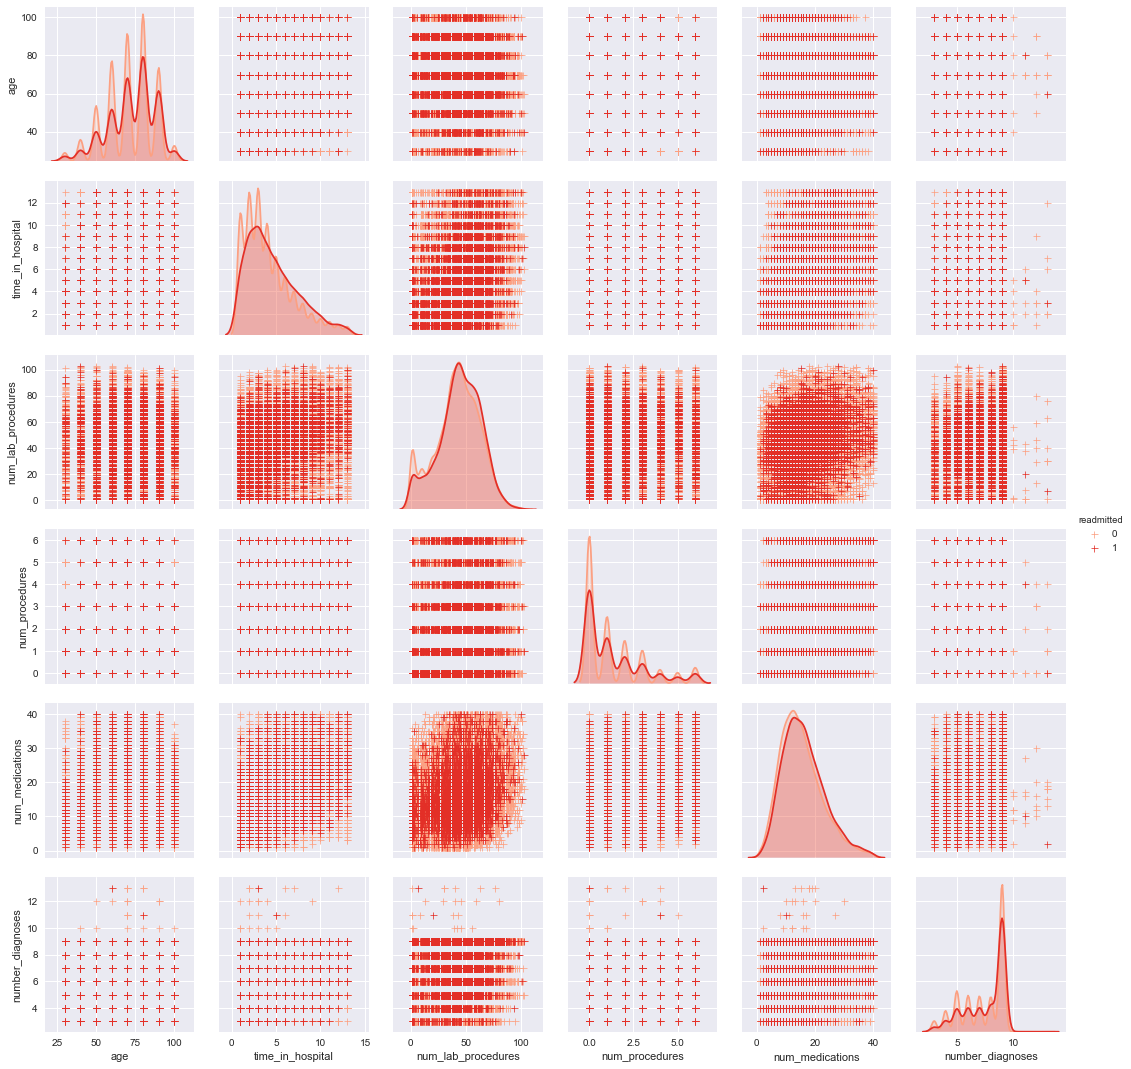

In [20]:
sns.pairplot(train, hue = 'readmitted', vars = num_cols, palette="Reds", markers="+")

- Labelling boxplot to see the amount of variation explained by continuous variables such as age, time in hospital, number of lab procedures, etc.

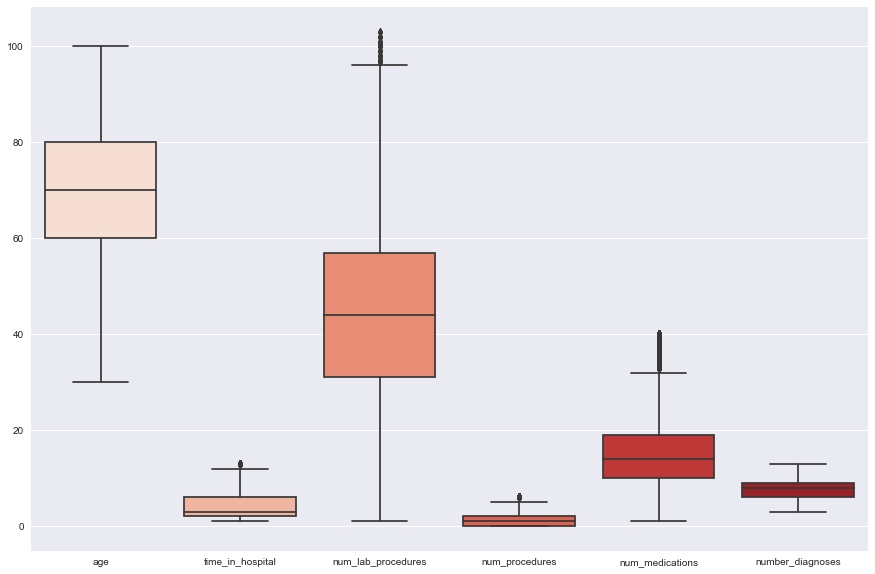

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(data = train[num_cols], palette="Reds")

- Checking the counts for number of 1's and 0's in target variable 'readmitted'
- By Analyzing, found that number of 0's are more and dataset is highly imbalanced, which will lead model to predict 0's correctly but not 1's

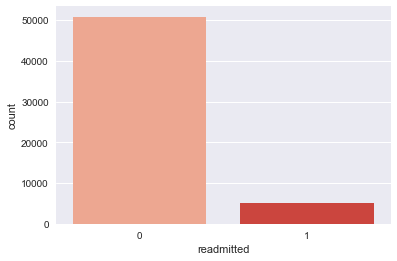

In [22]:
sns.countplot(train['readmitted'], label = "Count", palette="Reds")

- Separating the dataset from dependent variable 'readmitted' and all other independent variables 

In [23]:
train_input=train.drop('readmitted',axis=1)
train_output=train['readmitted']

print(train_input.shape)
print(train_output.shape)

(55944, 76)
(55944,)


- Since the dataset is highly imbalanced, applying oversampling by SMOTE to make equal number of 0's and 1's

In [24]:
print('Original dataset shape {}'.format(Counter(train_output)))

sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 50816, 1: 5128})
New dataset shape Counter({0: 50816, 1: 50816})


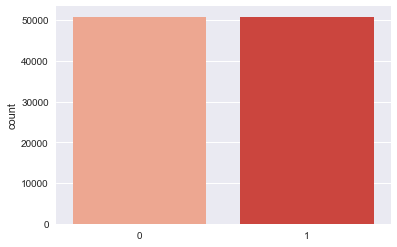

In [25]:
sns.countplot(train_output_new, label = "Count", palette="Reds")

<h1>STEP: 5 - Model Building and Evaluation</h1>

- Splitting the dataset into train and test, 80% of data will be used in training the model and 20% of data in evaluating the model
- Once the data is split, applying Min-Max Scaling to bring all the variable on one scale and not having influence of variables magnitude on model

In [26]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(train_input_new,train_output_new,test_size=0.2,random_state=2)

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train_unscaled)
X_test=scaler.transform(X_test_unscaled)

print(X_train)
print(X_test)

[[0.         0.42857143 0.16666667 ... 0.         0.         0.        ]
 [0.94064732 0.57142857 0.08827939 ... 0.1733508  0.         0.2541988 ]
 [0.63533566 0.57142857 0.16666667 ... 0.06720357 0.         0.19709244]
 ...
 [0.39486302 0.85714286 0.13376141 ... 0.07276885 0.11533589 0.        ]
 [0.         0.57142857 0.22962775 ... 0.         0.1392363  0.27023815]
 [1.         0.57142857 0.40598802 ... 0.         0.         0.23560883]]
[[0.         0.57142857 0.41666667 ... 0.         0.         0.        ]
 [0.         0.71428571 0.00612223 ... 0.17074973 0.         0.        ]
 [1.         0.28571429 0.33333333 ... 0.         0.         0.        ]
 ...
 [0.         0.42857143 0.25       ... 0.         0.         0.        ]
 [0.49471373 0.42857143 0.74823791 ... 0.         0.09117022 0.27309526]
 [0.51470972 0.42857143 0.16666667 ... 0.         0.         0.        ]]


<b> 1) Logistic Regression : </b>
   - Using Logistic Regression to see the relative impact of each variable and statistical significance of each factor on the probability of readmission
   - Training the Logistic Regression model on hyperparameter 'penalty' using Grid search and cross validation of 5
   - By Grid Search, we found that 'penalty'('l1') gives us the best result, using the best parameters to train our model

In [27]:
logit = LogisticRegression()
logit.fit(X_train,y_train)

param_grid = {'penalty':['l1', 'l2']}
grid_search = GridSearchCV(logit , param_grid, cv = 5 , return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'penalty': 'l1'}

- Once we trained our model on best parameters, calculated evaluation parameter such as recall, precision and f1 score to judge the model
- We found that, model has low evaluation parameters and concluded to use other algorithm to build our model

In [28]:
results = pd.DataFrame(index=None, columns=['model','f1_score_train','f1_score_test','train_precision_score',
                                            'test_precision_score','train_recall_score','test_recall_score'])

# Fitting the model on best parameters and priting the results
lreg_clf = LogisticRegression()
lreg_clf = LogisticRegression(penalty = 'l1')
lreg_clf.fit(X_train,y_train)
y_lreg_clf = lreg_clf.predict(X_test)
f1_score_train=f1_score(y_train, lreg_clf.predict(X_train))
f1_score_test=f1_score(y_test, lreg_clf.predict(X_test))
train_precision_score=precision_score(y_train,lreg_clf.predict(X_train))
test_precision_score=precision_score(y_test,lreg_clf.predict(X_test))
train_recall_score=recall_score(y_train,lreg_clf.predict(X_train))
test_recall_score=recall_score(y_test,lreg_clf.predict(X_test))
results = results.append(pd.Series({'model':'Logistic Regression','f1_score_train':f1_score_train,'f1_score_test':f1_score_test,
                                    'train_precision_score':train_precision_score,'train_recall_score':train_recall_score,
                                    'test_recall_score':test_recall_score,'test_precision_score':test_precision_score}) 
                         ,ignore_index=True )
results

,model,f1_score_train,f1_score_test,train_precision_score,test_precision_score,train_recall_score,test_recall_score
0,Logistic Regression,0.614488,0.61301,0.651122,0.647388,0.581756,0.5821


- Plotting confusion matrix for Logistic Regression, to see the number True positive, True Negative, False Positive and False Negative

Text(34.0, 0.5, 'Actual')

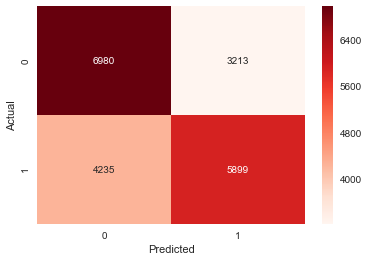

In [29]:
y_pred=lreg_clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('Actual')

<b> 2) Decision Tree : </b>
   - Using Decision Tree to capture the nonlinear effects of each features and interaction between variables
   - Training the Decision Tree model on hyperparameter 'max_depth' using Grid search and cross validation of 5
   - By Grid Search, we found that 'max_depth = 12' gives us the best result, using the best parameters to train our model
   - Calculating the evaluation metrics, after training the model, in order to judge it 
   - We found that built Decision tree model has overall good evaluation metrics

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=10)
param_grid = {'max_depth': [5,6,7, 8,10,12,15, 20, 50, 100]}

grid_search = GridSearchCV(dt_clf, param_grid, cv = 5, return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

dt_clf = DecisionTreeClassifier(max_depth = 12)
dt_clf.fit(X_train,y_train)
y_dt_clf = dt_clf.predict(X_test)
train_precision_score=precision_score(y_train,dt_clf.predict(X_train))
test_precision_score=precision_score(y_test,dt_clf.predict(X_test))
f1_score_train=f1_score(y_train, dt_clf.predict(X_train))
f1_score_test=f1_score(y_test, dt_clf.predict(X_test))
train_recall_score=recall_score(y_train,dt_clf.predict(X_train))
test_recall_score=recall_score(y_test,dt_clf.predict(X_test))
results = results.append(pd.Series({'model':'Decision Tree','f1_score_train':f1_score_train,'f1_score_test':f1_score_test,
                                    'train_precision_score':train_precision_score,
                                    'train_recall_score':train_recall_score,
                                    'test_recall_score':test_recall_score,'test_precision_score':test_precision_score})
                         ,ignore_index=True )
results

,model,f1_score_train,f1_score_test,train_precision_score,test_precision_score,train_recall_score,test_recall_score
0,Logistic Regression,0.614488,0.613010,0.651122,0.647388,0.581756,0.582100
1,Decision Tree,0.929367,0.920368,0.995285,0.984704,0.871639,0.863923


- Displaying confusion parameters to find number of correct and wrong prediction by the model for readmission or not

Text(34.0, 0.5, 'Actual')

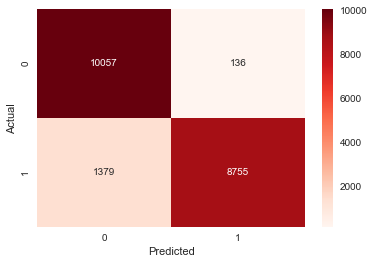

In [31]:
y_pred=dt_clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('Actual')

<b> 3) Random Forest : </b>
   - Since single tree has improved evaluation metrics so much, using many Decision trees with randomly assigned subsets of features, which is called Random Forest
   - Training the Random Forest model on hyperparameter 'max_depth', 'max_features', 'min_samples_split', 'min_samples_leaf' and 'Bootstrap', using Random search and iteration of 20
   - By Random Search and multiple iterations, we found that bootstrap=False, max_depth=8, max_features=22, min_samples_leaf=1, min_samples_split=5 gives us the best result, using the best parameters to train our model
   - Once we trained our model on best parameters, evaluation parameter such as recall, precision and f1 score was calculated to judge the model
   - We found that, model has best evaluation parameters in comparison to other algorithms and concluded Random Forest has go to algorithm for model deployment

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_grid = {"max_depth": [3, 5, 6,8],
              "max_features": sp_randint(1, 25),
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 20),
              "bootstrap": [True, False]}
random_search = RandomizedSearchCV(RandomForestClassifier(n_estimators=1000), param_distributions=param_grid,
                                   n_iter=20, random_state=0,n_jobs=-1, return_train_score=True)
random_search.fit(X_train, y_train)
random_search.best_params_

rf_clf = RandomForestClassifier(bootstrap=False,max_depth=8,max_features=22,min_samples_leaf=1,min_samples_split=5)
rf_clf.fit(X_train,y_train)
y_rf_clf = rf_clf.predict(X_test)
train_precision_score=precision_score(y_train,rf_clf.predict(X_train))
test_precision_score=precision_score(y_test,rf_clf.predict(X_test))
f1_score_train=f1_score(y_train, rf_clf.predict(X_train))
f1_score_test=f1_score(y_test, rf_clf.predict(X_test))
train_recall_score=recall_score(y_train,rf_clf.predict(X_train))
test_recall_score=recall_score(y_test,rf_clf.predict(X_test))
results = results.append(pd.Series({'model':'Random Forest','f1_score_train':f1_score_train,'f1_score_test':f1_score_test,
                                    'train_precision_score':train_precision_score,'train_recall_score':train_recall_score,
                                    'test_recall_score':test_recall_score,'test_precision_score':test_precision_score})
                         ,ignore_index=True )
results

,model,f1_score_train,f1_score_test,train_precision_score,test_precision_score,train_recall_score,test_recall_score
0,Logistic Regression,0.614488,0.613010,0.651122,0.647388,0.581756,0.582100
1,Decision Tree,0.929367,0.920368,0.995285,0.984704,0.871639,0.863923
2,Random Forest,0.925424,0.922825,0.993431,0.991386,0.866132,0.863134


- Labelling the actual and predicted numbers of 1's and 0's by Random Forest model

Text(34.0, 0.5, 'Actual')

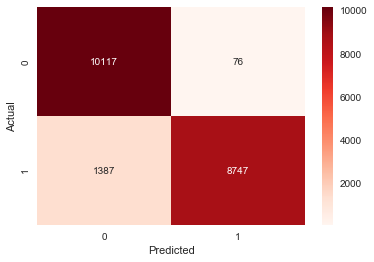

In [33]:
y_pred=rf_clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('Actual')

<h1>STEP: 6 - Best Model and Deployment</h1>

- Comparing 3 algorithms model on f1_score evaluation metric
- We found that Random Forest gives us the best result, on the basis of train and test f1_score

Text(0.5, 1.0, 'Train and Test f1_score')

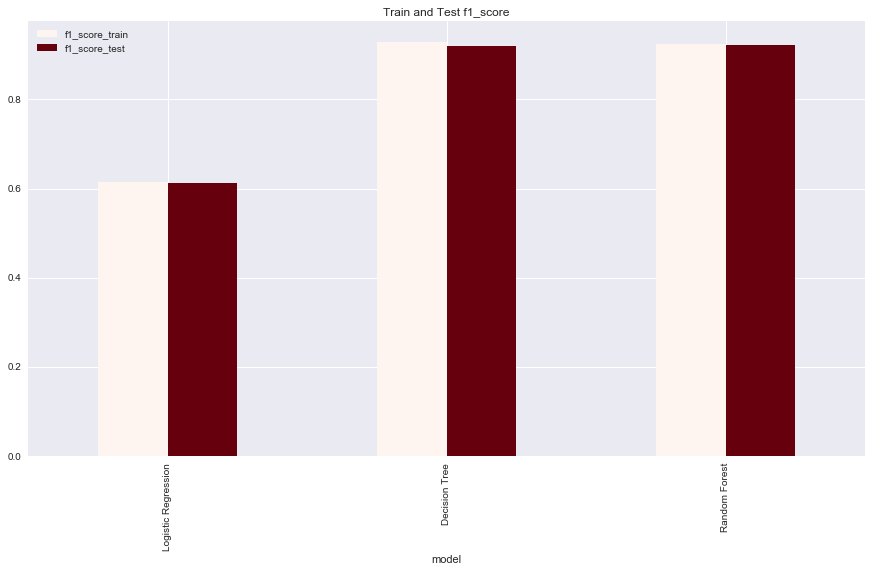

In [34]:
cols = ['model','f1_score_train','f1_score_test']
results[cols].set_index('model').plot(kind = 'bar', figsize=(15,8), cmap='Reds')
plt.title('Train and Test f1_score')

- Deploying the random forest model and min-max scaler transformation to create the pickle files and dump it
- Once the pickle files are created, passed one data to get the prediction and find prediction probability
- First prediction probability says the probability of not readmitting and second one of readmitting

In [35]:
import pickle

pickle.dump(scaler, open('tranform.pkl','wb'))
pickle.dump(rf_clf, open('model.pkl','wb'))

X_test=scaler.transform(X_test_unscaled[:1])

predictions=rf_clf.predict(X_test)
print("Predicted Result : ",predictions)

predictions = rf_clf.predict_proba(X_test)
print("Predicted Result probability : ",predictions)

Predicted Result :  [0]
Predicted Result probability :  [[0.7263008 0.2736992]]


- Built an interface in html for creating a complete product and mapping the deployed pickle files with 6 prominent features
- Interface has input such as Discharge to home, Insulin, Gender, metfromin, Change in medicine as binary values and Number of medicine as values ranging from 1 to 23
- Below is the image of product demo with desired inputs and result displaying probability of readmission or not

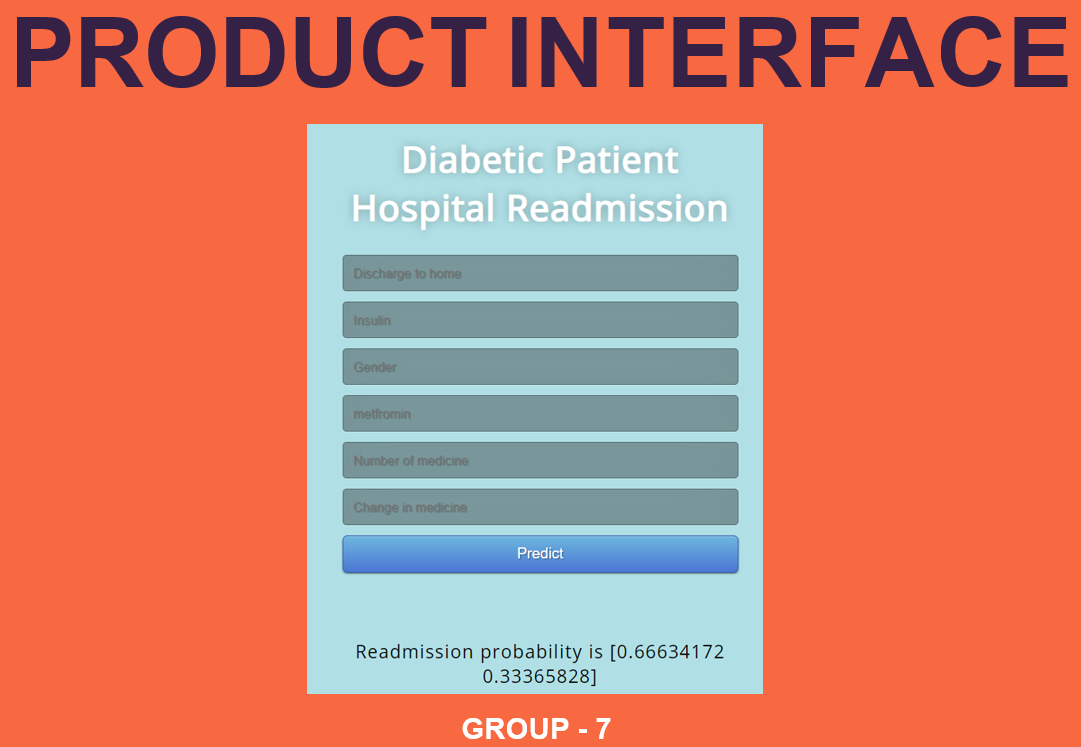

In [36]:
from IPython.display import Image
Image(filename=r'interface.png',width=1000, height=60)

<h1>STEP: 7 - Interpretations and Insights</h1>

- Interpreting the statistics from the models and drawing insights from it
- Running the Logistic Regression to find the weightage influence of each variable
- From Random Forest, obtaining feature importance of variables and plotting barplot for it

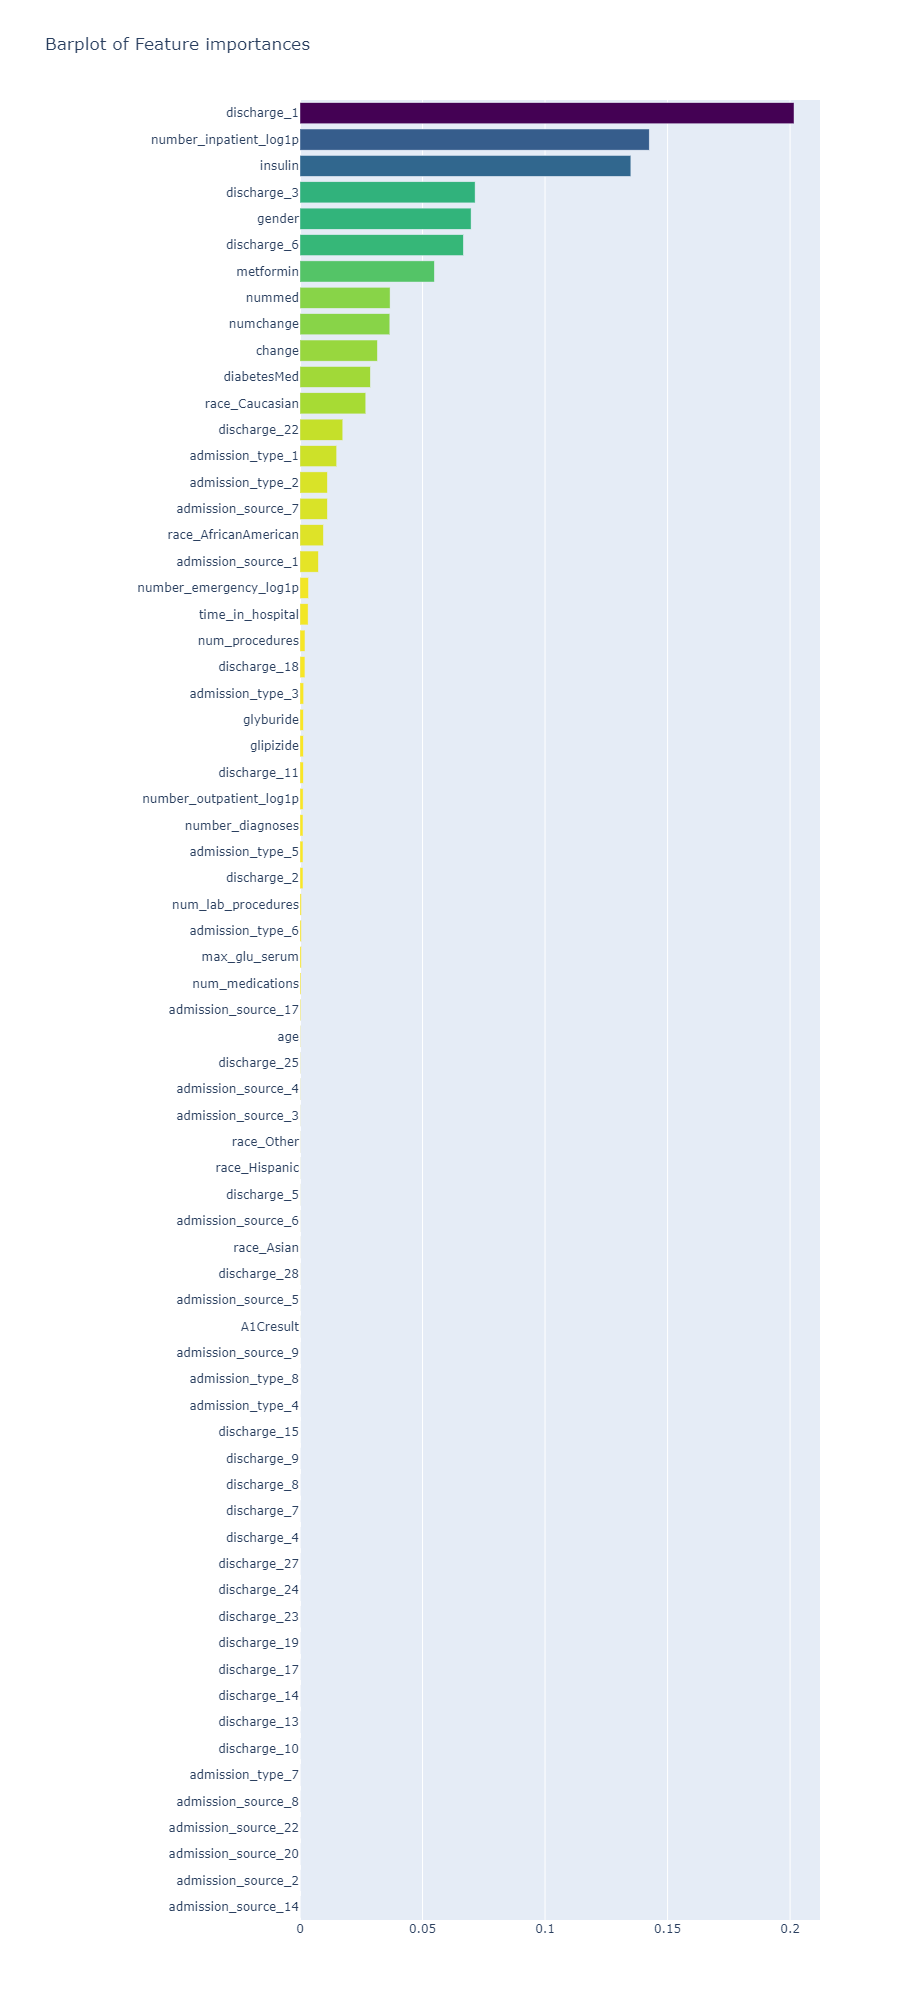

In [37]:
import plotly.graph_objs as go
import plotly.offline as py

features = train_input.columns.values

x, y = (list(x) for x in zip(*sorted(zip(rf_clf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=300,
),
)
fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)

py.plot(fig1, filename='plots')

from IPython.display import Image
Image(filename=r'newplot.png',width=500, height=30)

<b> INSIGHTS for Readmission : 
    - 1) For every 15 years up in age, increase 23% odds of readmission
    - 2) Discharge type, discharge to home is the most prominent factor in classifying readmission of diabetic patient
    - 3) Out of 23 medicine, we found that use of Insulin and Metafromin, increase the chance of readmission
    - 4) Race Caucasian are highly-likely to get readmitted in hospital
    - 5) Diabetic Male has more odds compared to female for readmission 
</b>

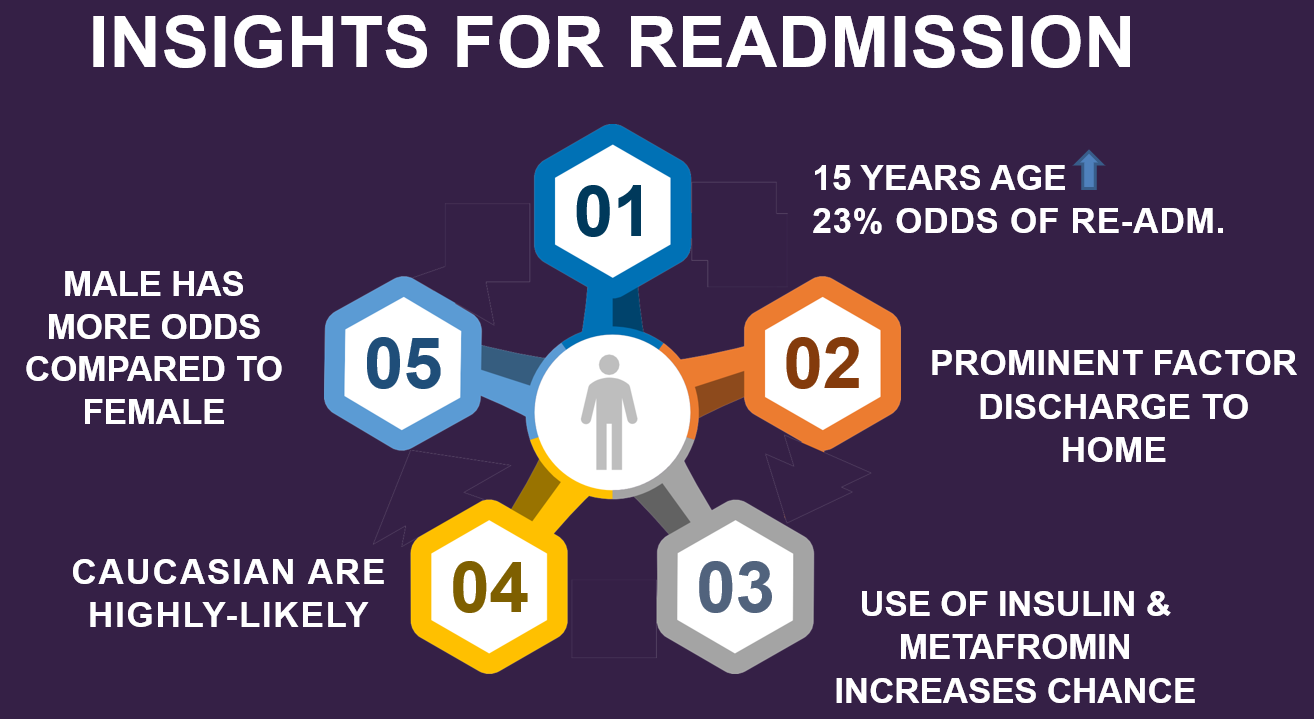

In [38]:
from IPython.display import Image
Image(filename=r'insights.png',width=1000, height=60)

<h1>STEP: 8 - Improvements and Future Work</h1>

<b> IMPROVEMENTS in project : 
    - 1) Using more features such as diag_1, diag_2, diag_3 to build the machine learning model
    - 2) Adding more prominent features on product interface as input
    - 3) Available dataset was from duration 1999-2008, getting more recent data to build the model
    - 4) Since the dataset was highly imbalanced, we restricted balancing of dataset on oversampling technique. We can use undersampling technique to balance dataset and improve the model
    - 5) Employing more machine learning algorithm to build model and check betterment, we had used only 3 algorithm Logistic Regression, Decision Tree and Random Forest
</b>

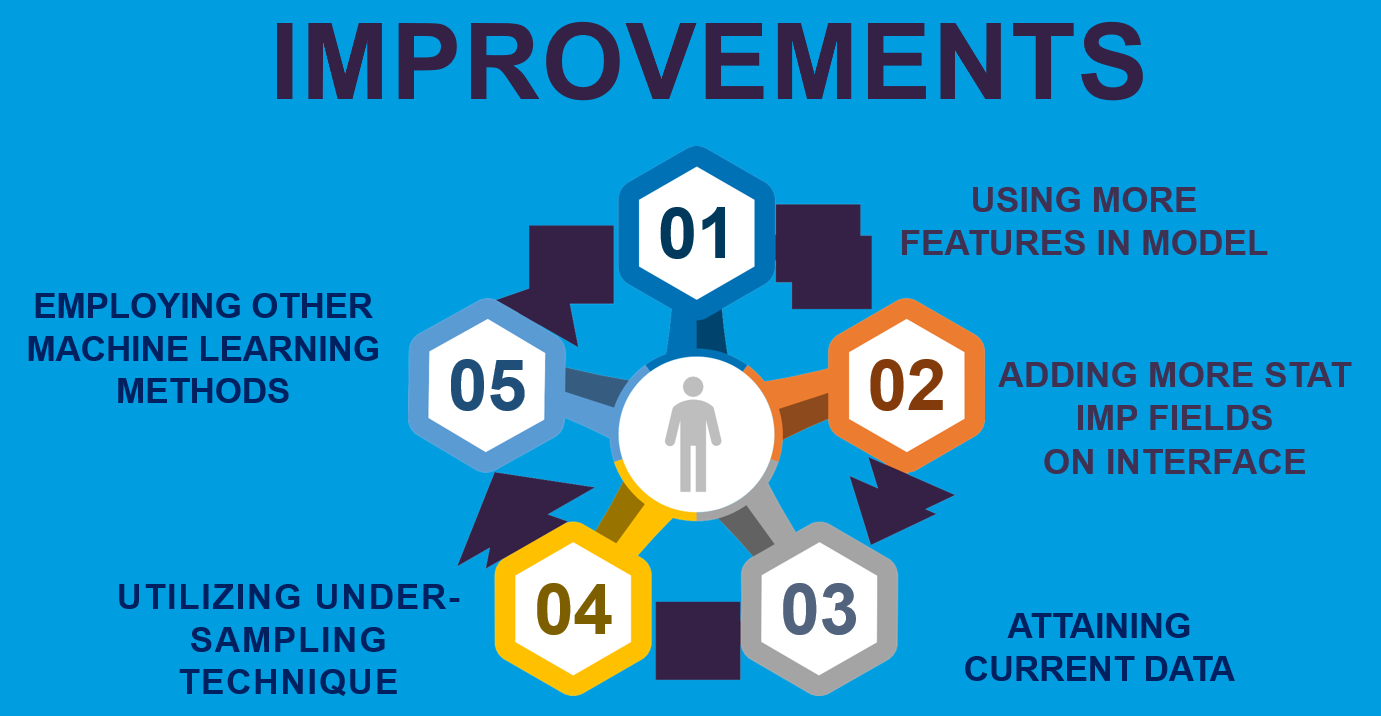

In [39]:
from IPython.display import Image
Image(filename=r'Improvements.png',width=1000, height=60)

<b> Reference : </b>
- https://towardsdatascience.com/
- https://www.coursera.org/
- https://medium.com/
- https://archive.ics.uci.edu/ml/datasets.php
- https://www.udemy.com/